Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [7]:
import pandas as pd

# Loading the data
file_path_yelp = '../data/city_bikes_Montreal.csv'
file_path_bikes = '../data/yelp_data.csv'

yelp_data = pd.read_csv(file_path_yelp)
bike_stations = pd.read_csv(file_path_bikes)

# Since the lat & long don't match exactly, I am rounding the latitude and longitude in both DataFrames
precision = 3 # This allowes me to control and experiment with the precision of the rounding
yelp_data['rounded_latitude'] = yelp_data['latitude'].round(precision)
yelp_data['rounded_longitude'] = yelp_data['longitude'].round(precision)
bike_stations['rounded_latitude'] = bike_stations['latitude'].round(precision)
bike_stations['rounded_longitude'] = bike_stations['longitude'].round(precision)

# Inner join on the rounded latitude and longitude
combined_data = pd.merge(bike_stations, yelp_data ,  how='inner', left_on=['rounded_latitude', 'rounded_longitude'], right_on=['rounded_latitude', 'rounded_longitude'])

In [8]:
combined_data.head()

,name_x,address,category,latitude_x,longitude_x,rating,rounded_latitude,rounded_longitude,name_y,latitude_y,longitude_y,free_bikes
0,Bagatelle,"4323 Rue Ontario E, Montreal, QC H1V 1K5, Canada","French, Breakfast & Brunch",45.552822,-73.539624,4.0,45.553,-73.54,Marché Maisonneuve,45.553219,-73.539782,11
1,Les Gourmandises de Marie-Antoinette,"4317 Rue Ontario E, Montreal, QC H1V 1K5, Canada","Bakeries, Tea Rooms",45.552910,-73.539780,4.5,45.553,-73.54,Marché Maisonneuve,45.553219,-73.539782,11
2,Pita Bar,"4315 Rue Ontario E, Montreal, QC H1V 1K5, Canada",Greek,45.552803,-73.539842,3.5,45.553,-73.54,Marché Maisonneuve,45.553219,-73.539782,11
3,Bagatelle,"4323 Rue Ontario E, Montreal, QC H1V 1K5, Canada","French, Breakfast & Brunch",45.552822,-73.539624,4.0,45.553,-73.54,Marché Maisonneuve,45.553219,-73.539782,11
4,Bagatelle,"4323 Rue Ontario E, Montreal, QC H1V 1K5, Canada","French, Breakfast & Brunch",45.552822,-73.539624,4.0,45.553,-73.54,Marché Maisonneuve,45.553219,-73.539782,11


In [9]:
# Take a look at the info of the DataFrame

combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name_x             143 non-null    object 
 1   address            143 non-null    object 
 2   category           143 non-null    object 
 3   latitude_x         143 non-null    float64
 4   longitude_x        143 non-null    float64
 5   rating             143 non-null    float64
 6   rounded_latitude   143 non-null    float64
 7   rounded_longitude  143 non-null    float64
 8   name_y             143 non-null    object 
 9   latitude_y         143 non-null    float64
 10  longitude_y        143 non-null    float64
 11  free_bikes         143 non-null    int64  
dtypes: float64(7), int64(1), object(4)
memory usage: 13.5+ KB


In [11]:
# Checking for nulls

combined_data.isnull().sum()

name_x               0
address              0
category             0
latitude_x           0
longitude_x          0
rating               0
rounded_latitude     0
rounded_longitude    0
name_y               0
latitude_y           0
longitude_y          0
free_bikes           0
dtype: int64

In [13]:
# Checking for duplicates

combined_data.duplicated().sum()

98

In [15]:
# Drop duplicates

combined_data.drop_duplicates(inplace=True)

In [16]:
# Taking another look at the head now that we have removed duplicates

combined_data.head(10)

,name_x,address,category,latitude_x,longitude_x,rating,rounded_latitude,rounded_longitude,name_y,latitude_y,longitude_y,free_bikes
0,Bagatelle,"4323 Rue Ontario E, Montreal, QC H1V 1K5, Canada","French, Breakfast & Brunch",45.552822,-73.539624,4.0,45.553,-73.540,Marché Maisonneuve,45.553219,-73.539782,11
1,Les Gourmandises de Marie-Antoinette,"4317 Rue Ontario E, Montreal, QC H1V 1K5, Canada","Bakeries, Tea Rooms",45.552910,-73.539780,4.5,45.553,-73.540,Marché Maisonneuve,45.553219,-73.539782,11
2,Pita Bar,"4315 Rue Ontario E, Montreal, QC H1V 1K5, Canada",Greek,45.552803,-73.539842,3.5,45.553,-73.540,Marché Maisonneuve,45.553219,-73.539782,11
19,India Rosa,"1241 Avenue du Mont-Royal E, Montreal, QC H2J ...","Indian, Cocktail Bars, Tapas Bars",45.529291,-73.578237,4.0,45.529,-73.578,du Mont-Royal / de Brébeuf,45.529337,-73.577953,6
23,Le Rouge Gorge,"1234 Mont-royal E, Montreal, QC H2J 1Y2, Canada","Wine Bars, Tapas/Small Plates",45.529112,-73.577978,4.5,45.529,-73.578,du Mont-Royal / de Brébeuf,45.529337,-73.577953,6
28,Pizzédélic,"1250 avenue du Mont-Royal Est, Montreal, QC H2...","Pizza, Food Delivery Services",45.529399,-73.577818,3.5,45.529,-73.578,du Mont-Royal / de Brébeuf,45.529337,-73.577953,6
29,Au Pain Perdu,"4489 Rue de la Roche, Montreal, QC H2J 3J1, Ca...",Breakfast & Brunch,45.528691,-73.578071,3.5,45.529,-73.578,du Mont-Royal / de Brébeuf,45.529337,-73.577953,6
30,Boîte Geisha Fusion Sushi,"1209 Mount Royal Avenue E, Montreal, QC H2J 1Y...","Japanese, Sushi Bars",45.528972,-73.578486,4.5,45.529,-73.578,du Mont-Royal / de Brébeuf,45.529337,-73.577953,6
31,Ibéricos,"4475 Rue Saint-Denis, Montreal, QC H2J 2L2, Ca...","Spanish, Tapas Bars",45.523902,-73.582430,4.5,45.524,-73.582,Métro Mont-Royal (Utilités publiques / Rivard),45.524236,-73.581552,2
39,Café Gentile,"9299 Avenue du Parc, Montreal, QC H2N 2A2, Canada","Sandwiches, Breakfast & Brunch",45.538197,-73.654510,4.0,45.538,-73.655,Chabanel / du Parc,45.538308,-73.654884,12


In [52]:
# Download the DataFrame to a CSV file for later use.

combined_data.to_csv('combined_data.csv', index=False)

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [20]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Checking the descriptive statistics

combined_data.describe()

,latitude_x,longitude_x,rating,rounded_latitude,rounded_longitude,latitude_y,longitude_y,free_bikes
count,45.000000,45.000000,45.00000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,45.524520,-73.575626,4.00000,45.524578,-73.575600,45.524628,-73.575589,7.733333
std,0.020226,0.022593,0.46466,0.020203,0.022591,0.020250,0.022671,5.193527
min,45.487754,-73.654510,3.00000,45.488000,-73.655000,45.488302,-73.654884,0.000000
25%,45.510731,-73.587480,3.50000,45.511000,-73.587000,45.510599,-73.586850,5.000000
50%,45.526767,-73.572148,4.00000,45.527000,-73.572000,45.527148,-73.571936,6.000000
75%,45.540899,-73.566750,4.50000,45.541000,-73.567000,45.541448,-73.566925,11.000000
max,45.560285,-73.532816,5.00000,45.560000,-73.533000,45.559705,-73.532633,22.000000


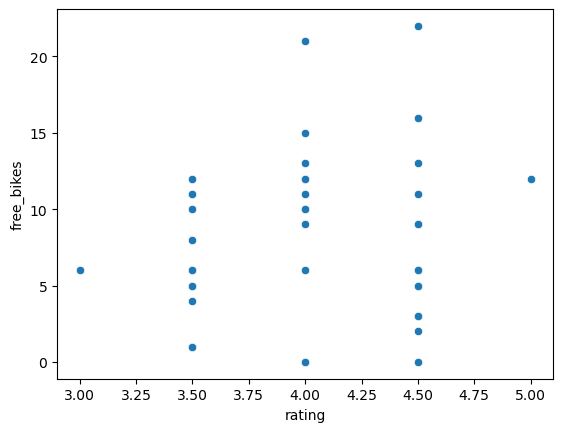

In [59]:
sns.scatterplot(x=combined_data['rating'], y=combined_data['free_bikes'], data=combined_data)
plt.show()

Text(0.5, 1.0, 'Distribution of [Variable]')

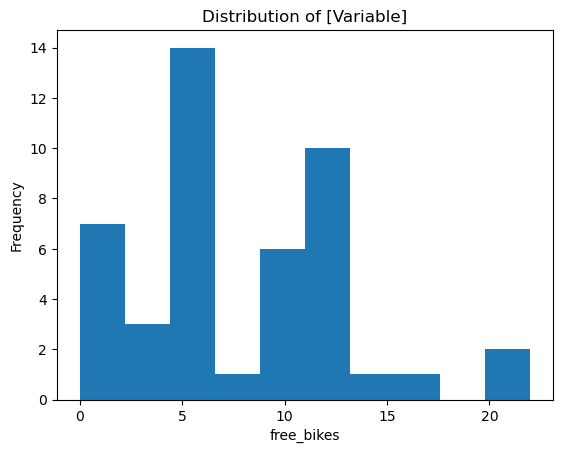

In [25]:
# Checking the distribution of free_bikes
plt.hist(combined_data['free_bikes'])
plt.xlabel('free_bikes')
plt.ylabel('Frequency')
plt.title('Distribution of [Variable]')

Text(0.5, 1.0, 'Correlation Matrix')

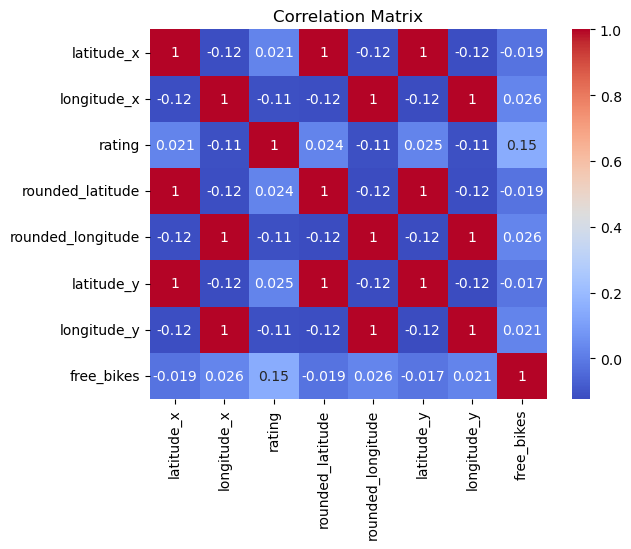

In [36]:
# Correlation analysis
selected_columns = ['latitude_x', 'longitude_x', 'rating', 'rounded_latitude', 'rounded_longitude', 'latitude_y', 'longitude_y', 'free_bikes']
corr_matrix = combined_data[selected_columns].corr()

# Create a heatmap to visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")

**Note**: In my analysis, you can see a small correlation between the rating of the restaurant and the number of free bikes.

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [37]:
import sqlite3

In [38]:
database_path = '../data/results.db'

# Connect to the database
conn = conn = sqlite3.connect(database_path)

# I need to convert the DataFrame to a SQL Table

combined_data.to_sql('combined_data', conn, if_exists='replace', index=False)

45

In [40]:
# Test query to make sure I was succesful

cursor = conn.cursor()
cursor.execute("SELECT * FROM combined_data LIMIT 10;")
print(cursor.fetchall())

[('Bagatelle', '4323 Rue Ontario E, Montreal, QC H1V 1K5, Canada', 'French, Breakfast & Brunch', 45.5528219, -73.5396242, 4.0, 45.553, -73.54, 'Marché Maisonneuve', 45.55321884238814, -73.53978216648102, 11), ('Les Gourmandises de Marie-Antoinette', '4317 Rue Ontario E, Montreal, QC H1V 1K5, Canada', 'Bakeries, Tea Rooms', 45.5529099, -73.5397797, 4.5, 45.553, -73.54, 'Marché Maisonneuve', 45.55321884238814, -73.53978216648102, 11), ('Pita Bar', '4315 Rue Ontario E, Montreal, QC H1V 1K5, Canada', 'Greek', 45.552803, -73.539842, 3.5, 45.553, -73.54, 'Marché Maisonneuve', 45.55321884238814, -73.53978216648102, 11), ('India Rosa', '1241 Avenue du Mont-Royal E, Montreal, QC H2J 1Y2, Canada', 'Indian, Cocktail Bars, Tapas Bars', 45.529291, -73.578237, 4.0, 45.529, -73.578, 'du Mont-Royal / de Brébeuf', 45.52933653055564, -73.57795268297195, 6), ('Le Rouge Gorge', '1234 Mont-royal E, Montreal, QC H2J 1Y2, Canada', 'Wine Bars, Tapas/Small Plates', 45.5291117540899, -73.5779781639576, 4.5, 45.

In [41]:
# Close the connection
conn.close()

Look at the data before and after the join to validate your data.

In [42]:
# Taking a look at the Yelp data

print("Yelp Data: ")
print(yelp_data.shape)
print(yelp_data.head())
print(yelp_data.isnull().sum())

Yelp Data: 
(160, 6)
                                                name   latitude  longitude  \
0      Gare d'autocars de Montréal (Berri / Ontario)  45.516926 -73.564257   
1                                 Marché Maisonneuve  45.553219 -73.539782   
2                                Rachel / de Brébeuf  45.526890 -73.572640   
3      Bibliothèque d'Ahuntsic (Lajeunesse / Fleury)  45.553400 -73.662255   
4  Cité des Arts du Cirque (Paul Boutet / des Reg...  45.559842 -73.615447   

   free_bikes  rounded_latitude  rounded_longitude  
0          12            45.517            -73.564  
1          11            45.553            -73.540  
2           1            45.527            -73.573  
3           6            45.553            -73.662  
4          17            45.560            -73.615  
name                 0
latitude             0
longitude            0
free_bikes           0
rounded_latitude     0
rounded_longitude    0
dtype: int64


In [48]:
# Taking a look at the city_bike data

print("Bixi Data: ")
print(bike_stations.shape)
print(bike_stations.head())
print(bike_stations.isnull().sum())

Bixi Data: 
(3182, 8)
                   name                                            address  \
0         Le Saint-Bock  1749 Rue Saint-Denis, Montreal, QC H2X 3K4, Ca...   
1  Pizzeria Dei Compari  1668 Rue Saint-Denis, Montreal, QC H2X 3K6, Ca...   
2         Bouillon Bilk  1595 Boulevard Saint-Laurent, Montreal, QC H2X...   
3          Poutineville   1365 Rue Ontario E, Montreal, QC H2L 1S1, Canada   
4       Les Deux Gamins  170 Rue Prince Arthur E, Montreal, QC H2X 1B7,...   

                           category   latitude  longitude  rating  \
0                        Brasseries  45.515820 -73.564641     4.0   
1                             Pizza  45.515000 -73.563750     4.0   
2                   Modern European  45.511040 -73.565800     4.5   
3                       Poutineries  45.523205 -73.561300     4.5   
4  French, Wine Bars, Cocktail Bars  45.515450 -73.570950     4.0   

   rounded_latitude  rounded_longitude  
0            45.516            -73.565  
1           

In [49]:
# Taking a look at the combined data

print("Combined Data: ")
print(combined_data.shape)
print(combined_data.head())
print(combined_data.isnull().sum())

Combined Data: 
(45, 12)
                                  name_x  \
0                              Bagatelle   
1   Les Gourmandises de Marie-Antoinette   
2                               Pita Bar   
19                            India Rosa   
23                        Le Rouge Gorge   

                                              address  \
0    4323 Rue Ontario E, Montreal, QC H1V 1K5, Canada   
1    4317 Rue Ontario E, Montreal, QC H1V 1K5, Canada   
2    4315 Rue Ontario E, Montreal, QC H1V 1K5, Canada   
19  1241 Avenue du Mont-Royal E, Montreal, QC H2J ...   
23    1234 Mont-royal E, Montreal, QC H2J 1Y2, Canada   

                             category  latitude_x  longitude_x  rating  \
0          French, Breakfast & Brunch   45.552822   -73.539624     4.0   
1                 Bakeries, Tea Rooms   45.552910   -73.539780     4.5   
2                               Greek   45.552803   -73.539842     3.5   
19  Indian, Cocktail Bars, Tapas Bars   45.529291   -73.578237     4.0 

In [50]:
# Summary Statistics Before the Join
print("Summary Statistics - Yelp Data:")
print(yelp_data.describe())
print("\n")
print("Summary Statistics - Bike Stations Data:")
print(bike_stations.describe())

Summary Statistics - Yelp Data:
         latitude   longitude  free_bikes  rounded_latitude  rounded_longitude
count  160.000000  160.000000  160.000000        160.000000         160.000000
mean    45.521238  -73.579857    8.600000         45.521225         -73.579837
std      0.024221    0.028689    5.827931          0.024259           0.028663
min     45.467666  -73.667357    0.000000         45.468000         -73.667000
25%     45.501837  -73.589594    4.750000         45.501750         -73.589250
50%     45.521267  -73.571923    8.000000         45.521500         -73.572000
75%     45.542550  -73.560740   12.000000         45.542500         -73.561000
max     45.562219  -73.530250   34.000000         45.562000         -73.530000


Summary Statistics - Bike Stations Data:
          latitude    longitude       rating  rounded_latitude  \
count  3182.000000  3182.000000  3182.000000       3182.000000   
mean     45.520243   -73.579722     4.191860         45.520230   
std       0.0231

In [51]:
# Summary Statistics After the Join
print("Summary Statistics - Combined Data:")
print(combined_data.describe())

Summary Statistics - Combined Data:
       latitude_x  longitude_x    rating  rounded_latitude  rounded_longitude  \
count   45.000000    45.000000  45.00000         45.000000          45.000000   
mean    45.524520   -73.575626   4.00000         45.524578         -73.575600   
std      0.020226     0.022593   0.46466          0.020203           0.022591   
min     45.487754   -73.654510   3.00000         45.488000         -73.655000   
25%     45.510731   -73.587480   3.50000         45.511000         -73.587000   
50%     45.526767   -73.572148   4.00000         45.527000         -73.572000   
75%     45.540899   -73.566750   4.50000         45.541000         -73.567000   
max     45.560285   -73.532816   5.00000         45.560000         -73.533000   

       latitude_y  longitude_y  free_bikes  
count   45.000000    45.000000   45.000000  
mean    45.524628   -73.575589    7.733333  
std      0.020250     0.022671    5.193527  
min     45.488302   -73.654884    0.000000  
25%     4